Import all libraries and load in the numpy arrays

In [1]:
import pickle
import time
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# X_train= pickle.load(open("X_train.pickle","rb"))
# y_train = pickle.load(open("y_train.pickle","rb"))

Normalize data

In [ ]:
X_train=X_train/255.0
y_train = to_categorical(y_train)

In [2]:
dirpath='C:/Users/moham/Desktop/Data/breastImagesJPEG'
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect',
    channel_shift_range=0.5,
    rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        dirpath+'/train',
        batch_size=12,
        target_size=(256, 256),
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        dirpath+'/val',
        target_size=(256, 256),
        batch_size=12,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    dirpath+'/test',
    target_size=(256, 256),
    batch_size=12,
    class_mode='categorical',
    shuffle=False
)

imgs, labels= next(train_generator)

Found 2943 images belonging to 3 classes.
Found 840 images belonging to 3 classes.
Found 423 images belonging to 3 classes.


In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(50,50))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img, cmap='CMRmap_r')
        ax.axis('on')
    plt.tight_layout
    plt.show()

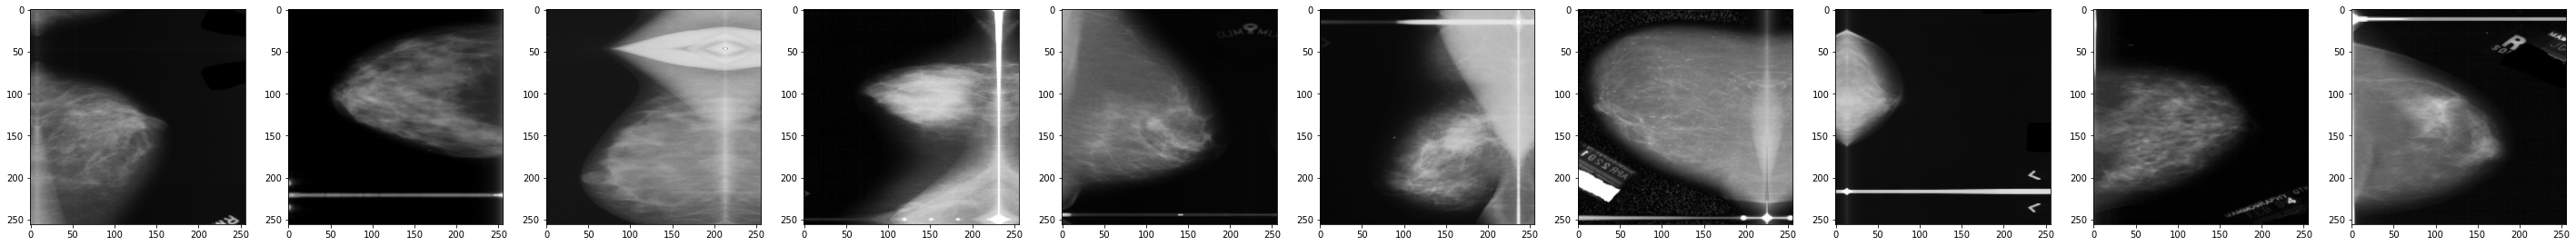

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [4]:
import matplotlib.pyplot as plt
plotImages(imgs)
print(labels)

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# load model without classifier layers
model = Xception(include_top=False, input_shape=(256,256,3),weights="imagenet")
# add new classifier layers
model.trainable=False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1000, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [6]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [7]:
NAME = "Xception-d1000-d3-256-flow{}".format(int(time.time()))
EarlyStop=EarlyStopping(patience=10,monitor='val_loss')
checkpoints=ModelCheckpoint(filepath=f'ModelCheckPoints/{NAME}.h5', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='DeepModels/{}'.format(NAME))
callbacks=[EarlyStop,checkpoints,tensorboard]
# history=model.fit(datagen.flow(X_train, y_train, batch_size=20,
#          subset='training'),
#          validation_data=datagen.flow(X_train, y_train,
#          batch_size=5, subset='validation'),
#          steps_per_epoch=len(X_train) / 40, epochs=50,callbacks=[callbacks])

c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/30
246/246 [==============================] - 122s 473ms/step - loss: 4.3141 - accuracy: 0.5586 - val_loss: 0.6899 - val_accuracy: 0.6262

In [9]:
history=model.fit(train_generator,
        steps_per_epoch=len (train_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
                  callbacks=[callbacks])

Epoch 1/10
246/246 [==============================] - 110s 447ms/step - loss: 0.6048 - accuracy: 0.6989 - val_loss: 0.5706 - val_accuracy: 0.7226

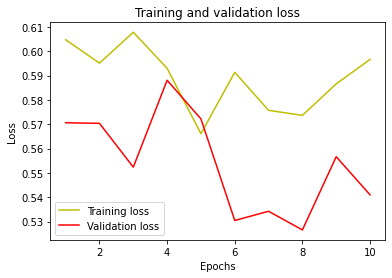

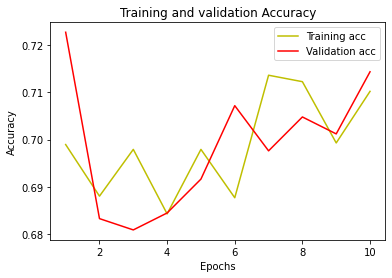

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y', label = "Training acc")
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import itertools

from numpy import loadtxt
from tensorflow.keras.models import load_model
import pickle
model = load_model('ModelCheckPoints/Xception-d1000-d3-1633647124.h5')

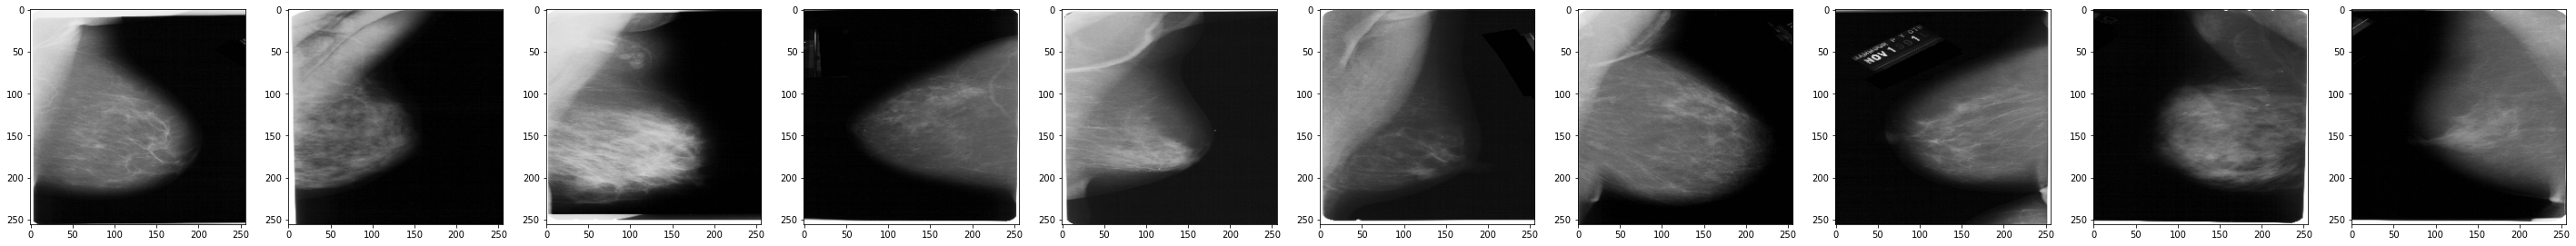

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
test_Images, test_labels= next(test_generator)
plotImages(test_Images)
print(test_labels)

In [12]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [21]:
predictions =model.predict(x=test_generator, verbose=1)

36/36 [==============================] - 8s 224ms/step

In [15]:
import numpy as np
np.round(predictions)

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=test_generator.classes,y_pred=np.argmax(predictions,axis=-1))

In [17]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks,classes, rotation=45)
	plt.yticks(tick_marks,classes)

	if normalize:
		cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
		print("Normalized Confusion matrix")
	else:
		print("Confusion matrix, without normalization")

	print(cm)

	thresh = cm.max()/ 2.
	for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j,i,cm[i,j],
				 horizontalalignment="center",
				 color="white" if cm[i,j] > thresh else "black")

	plt.tight_layout()
	plt.ylabel('true label')
	plt.xlabel('predicted label')

In [18]:
test_generator.class_indices

{'Benign': 0, 'Cancer': 1, 'Normal': 2}

Confusion matrix, without normalization
[[ 66  66   9]
 [ 48  87   6]
 [  0   5 136]]


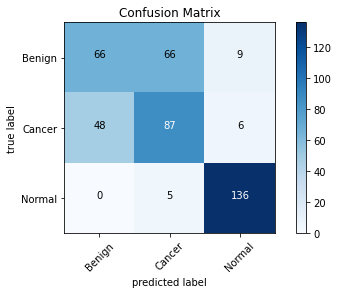

In [20]:
import itertools
cm_plot_labels=['Benign','Cancer','Normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels,title='Confusion Matrix')

In [22]:

score = model.evaluate(test_generator)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

36/36 [==============================] - 8s 221ms/step - loss: 0.5552 - accuracy: 0.6832

In [25]:
from sklearn import metrics
print(metrics.classification_report(test_generator.classes,np.argmax(predictions,axis=-1),digits=3))

              precision    recall  f1-score   support

           0      0.579     0.468     0.518       141
           1      0.551     0.617     0.582       141
           2      0.901     0.965     0.932       141

    accuracy                          0.683       423
   macro avg      0.677     0.683     0.677       423
weighted avg      0.677     0.683     0.677       423

